In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/Air_Quality/rf_regression_mix_outliers_none.csv"
df_5 = pd.read_csv(path)
df_5.reset_index(drop=True)
df_5['percentage'] = 100 - df_5['percentage']
df_5

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.783063
1,100,none,none,none,0.782880
2,100,none,none,none,0.783927
3,100,none,none,none,0.784079
4,90,none,none,none,0.775378
...,...,...,...,...,...
519,50,lof,LOCF,interpolation,0.752011
520,50,hst,drop,LOCF,0.782487
521,50,hst,drop,interpolation,0.783923
522,50,hst,LOCF,LOCF,0.765558


In [3]:
path = "../../../Risultati/Air_Quality/rf_regression_mix_none_outliers.csv"
df_6 = pd.read_csv(path)
df_6.reset_index(drop=True)
df_6['percentage'] = 100 - df_6['percentage']
df_6

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.783063
1,100,none,none,none,0.782880
2,100,none,none,none,0.783927
3,100,none,none,none,0.784079
4,90,none,none,none,0.775378
...,...,...,...,...,...
519,50,lof,LOCF,interpolation,0.748149
520,50,hst,drop,LOCF,0.782230
521,50,hst,drop,interpolation,0.782829
522,50,hst,LOCF,LOCF,0.765507


In [4]:
df_none = df_5[(df_5['outlier'] == 'none') & (df_5['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()

In [5]:
df_z_drop_locf_5 = df_5[(df_5['outlier'] == 'z') & (df_5['correction']=='drop') & (df_5['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()

df_z_drop_locf_6 = df_6[(df_6['outlier'] == 'z') & (df_6['correction']=='drop') & (df_6['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()

In [6]:
df_z_locf_locf_5 = df_5[(df_5['outlier'] == 'z') & (df_5['correction']=='LOCF') & (df_5['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()

df_z_locf_locf_6 = df_6[(df_6['outlier'] == 'z') & (df_6['correction']=='LOCF') & (df_6['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()

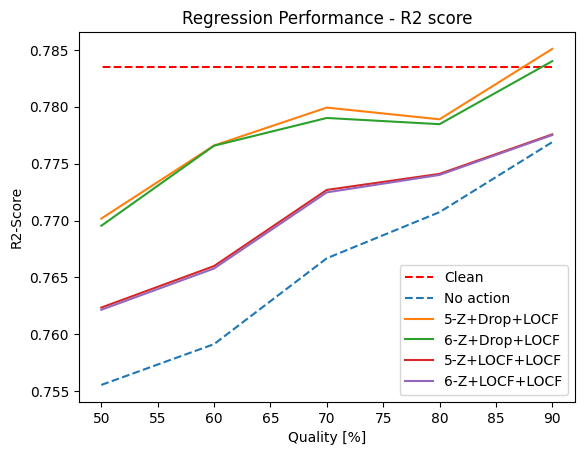

In [7]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_z_locf['percentage'],df_z_locf['CI_Min'],df_z_locf['CI_Max'],alpha=.05)
plt.plot(df_z_drop_locf_5['percentage'],df_z_drop_locf_5['mean'], label='5-Z+Drop+LOCF')
plt.plot(df_z_drop_locf_6['percentage'],df_z_drop_locf_6['mean'], label='6-Z+Drop+LOCF')
plt.plot(df_z_locf_locf_5['percentage'],df_z_locf_locf_5['mean'], label='5-Z+LOCF+LOCF')
plt.plot(df_z_locf_locf_6['percentage'],df_z_locf_locf_6['mean'], label='6-Z+LOCF+LOCF')
plt.ylabel("R2-Score")
plt.xlabel("Quality [%]")
plt.title("Regression Performance - R2 score")
plt.legend()

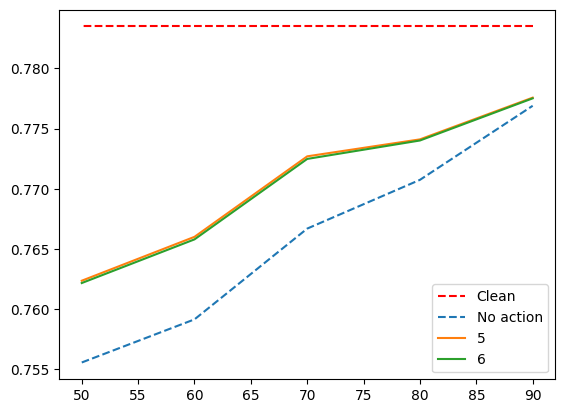

In [8]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_z_locf['percentage'],df_z_locf['CI_Min'],df_z_locf['CI_Max'],alpha=.05)
plt.plot(df_z_locf_locf_5['percentage'],df_z_locf_locf_5['mean'], label='5')
plt.plot(df_z_locf_locf_6['percentage'],df_z_locf_locf_6['mean'], label='6')
plt.legend()